# Neo4j Graph Export

In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object
graphipy = GraphiPy("neo4j")

In [3]:
# The reddit API needs these credentials
reddit_api_credentials = {
    "client_id": ' ',
    "client_secret": ' ',
    "user_agent": ' ',
    "username": " ",
    "password": " "
}

# create the reddit object
reddit = graphipy.get_reddit(reddit_api_credentials)

# Find Comments in a Submission

In [4]:
submission_id = "9uolpb"
graph = graphipy.create_graph("neo4j", " ")
graph.delete_graph()

ServiceUnavailable: Cannot send POST request to </db/data/transaction/commit>

In [5]:
reddit.fetch_submission_comments(graph, submission_id, limit=5)

# Visualization with NetworkX

In [6]:
import networkx as nx
import pprint

In [7]:
nx_graph = nx.Graph()

In [8]:
nodes = graph.get_nodes()

In [9]:
edges = graph.get_edges()

In [10]:
for edge in edges:
    edge = edge["r"]
    source = edge["Source"]
    target = edge["Target"]
    attr = {
        "Label": edge["Label"],
        "label_attribute": edge["label_attribute"],
        "_id": edge["_id"]
    }
    nx_graph.add_edge(source, target, attr_dict=attr)

In [11]:
for node in nodes:
    node = node["n"]
    nx_node = nx_graph.node[node["_id"]]
    for attr in node.keys():
        nx_node[attr] = node[attr]

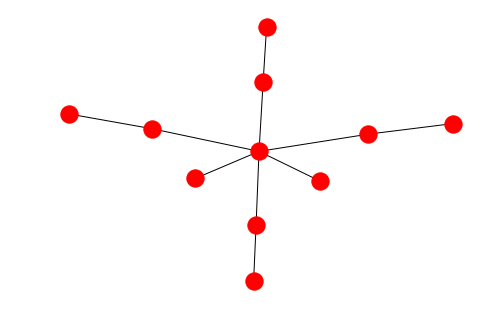

In [13]:
nx.draw(nx_graph)